# Neural network classifier and optimiser

In [1]:
from neural_network import NeuralNetworkClassifier, GeneticAlgorithmOptimiser
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
import random
import numpy as np

## Multi-classification problem with Iris

In [2]:
iris = load_iris()
irisdata = np.array(iris.data)
iristarget = np.array(iris.target)

joined_data = list(zip(irisdata, iristarget))
random.shuffle(joined_data)
irisdata, iristarget = zip(*joined_data)


train_size = int(0.8 * len(irisdata))

train_data, train_labels = irisdata[:train_size], iristarget[:train_size] 

test_data, test_labels = irisdata[train_size:], iristarget[train_size:]

In [3]:
model = NeuralNetworkClassifier(train_data, train_labels, test_data, test_labels,
                                hidden_layer_sizes=[5, 3])

print(f"Pre-optimised accuracy: {model.calc_accuracy()}%")

optimiser = GeneticAlgorithmOptimiser(model, 100, 50, 0.02)
opt_model, datalogger = optimiser.execute()

print(f"Optimised accuracy: {opt_model.calc_accuracy()}%")

Number of layers: 4
Pre-optimised accuracy: 30.0%
Generation 0 complete. Loss: 1.299
Generation 1 complete. Loss: 1.382
Generation 2 complete. Loss: 1.217
Generation 3 complete. Loss: 1.140
Generation 4 complete. Loss: 1.373
Generation 5 complete. Loss: 1.121
Generation 6 complete. Loss: 1.394
Generation 7 complete. Loss: 1.121
Generation 8 complete. Loss: 1.132
Generation 9 complete. Loss: 1.160
Generation 10 complete. Loss: 1.106
Generation 11 complete. Loss: 1.232
Generation 12 complete. Loss: 1.143
Generation 13 complete. Loss: 1.176
Generation 14 complete. Loss: 1.086
Generation 15 complete. Loss: 1.068
Generation 16 complete. Loss: 1.172
Generation 17 complete. Loss: 1.083
Generation 18 complete. Loss: 1.055
Generation 19 complete. Loss: 1.046
Generation 20 complete. Loss: 0.995
Generation 21 complete. Loss: 0.993
Generation 22 complete. Loss: 0.913
Generation 23 complete. Loss: 0.916
Generation 24 complete. Loss: 0.758
Generation 25 complete. Loss: 0.702
Generation 26 complete. 

### Loss and accuracy training log 

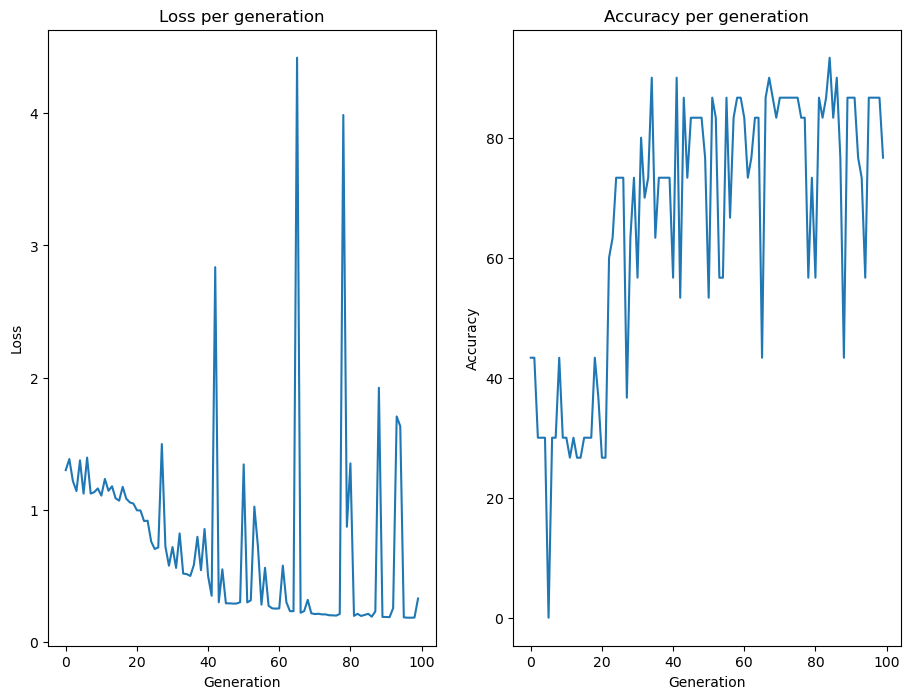

In [4]:
import seaborn as sns
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(11)
fig.set_figheight(8)

sns.lineplot(x=np.arange(len(datalogger["test_loss_per_generation"])),
             y=datalogger["test_loss_per_generation"], ax=ax[0]).set(title = "Loss per generation", xlabel = "Generation", ylabel = "Loss")

sns.lineplot(x=np.arange(len(datalogger["test_accuracy_per_generation"])),
             y=datalogger["test_accuracy_per_generation"], ax=ax[1]).set(title="Accuracy per generation", xlabel = "Generation", ylabel = "Accuracy")

plt.show()

### Making a prediction

In [5]:
classes = ["Setosa", "Versicolor", "Virginica"]

versicolor = [5.6, 2.9, 3.6, 1.3] # label 1

label = opt_model.predict(versicolor)
print(classes[label])

Versicolor


## Binary classification with Wisconsin breast cancer data

In [6]:
wisc_data = load_breast_cancer()
data = np.array(wisc_data.data)
target = np.array(wisc_data.target)

joined_data = list(zip(data, target))
random.shuffle(joined_data)
data, target = zip(*joined_data)

train_size = int(0.8 * len(data))

train_data, train_labels = data[:train_size], target[:train_size] 
test_data, test_labels = data[train_size:], target[train_size:]

wisc_model = NeuralNetworkClassifier(train_data, train_labels, test_data, test_labels,
                                     hidden_layer_sizes=[20, 10])

print(f"Number of inputs: {len(train_data[0])}")
print(f"Number of outputs: {max(test_labels)}")

wisc_optimiser = GeneticAlgorithmOptimiser(wisc_model, 100, 50, 0.02)

print(f"Pre-optimised accuracy: {wisc_model.calc_accuracy()}%")

opt_wisc_model, datalogger = wisc_optimiser.execute()

print(f"Optimised accuracy: {opt_wisc_model.calc_accuracy()}%")

Number of layers: 4
Number of inputs: 30
Number of outputs: 1
Pre-optimised accuracy: 34.21%
Generation 0 complete. Loss: 7.262
Generation 1 complete. Loss: 2.899
Generation 2 complete. Loss: 0.647
Generation 3 complete. Loss: 5.728
Generation 4 complete. Loss: 1.204
Generation 5 complete. Loss: 4.671
Generation 6 complete. Loss: 0.819
Generation 7 complete. Loss: 0.677
Generation 8 complete. Loss: 0.816
Generation 9 complete. Loss: 0.745
Generation 10 complete. Loss: 1.165
Generation 11 complete. Loss: 0.666
Generation 12 complete. Loss: 7.588
Generation 13 complete. Loss: 0.648
Generation 14 complete. Loss: 5.951
Generation 15 complete. Loss: 0.633
Generation 16 complete. Loss: 0.646
Generation 17 complete. Loss: 0.606
Generation 18 complete. Loss: 0.625
Generation 19 complete. Loss: 0.890
Generation 20 complete. Loss: 6.735
Generation 21 complete. Loss: 0.601
Generation 22 complete. Loss: 4.114
Generation 23 complete. Loss: 12.865
Generation 24 complete. Loss: 1.277
Generation 25 co

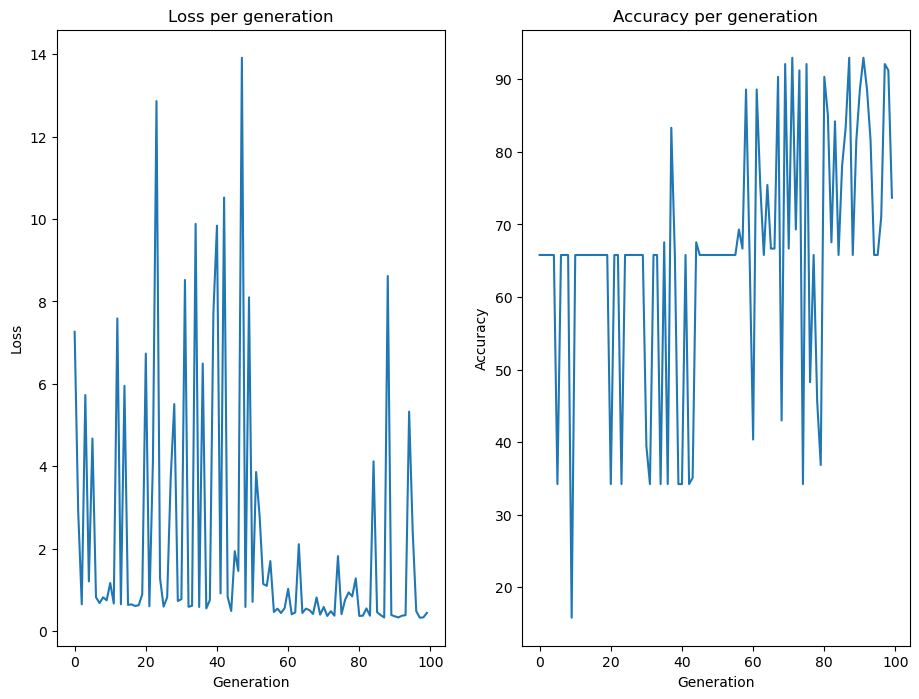

In [7]:
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(11)
fig.set_figheight(8)

sns.lineplot(x=np.arange(len(datalogger["test_loss_per_generation"])),
             y=datalogger["test_loss_per_generation"], ax=ax[0]).set(title = "Loss per generation", xlabel = "Generation", ylabel = "Loss")

sns.lineplot(x=np.arange(len(datalogger["test_accuracy_per_generation"])),
             y=datalogger["test_accuracy_per_generation"], ax=ax[1]).set(title="Accuracy per generation", xlabel = "Generation", ylabel = "Accuracy")

plt.show()